# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [204]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../traffic-signs-data/train.p'
testing_file = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print('Done loading data')

Done loading data


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [205]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [206]:
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.cross_validation import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0)

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

1
8
9
28
38
7
1
1
27
11


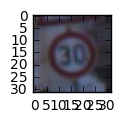

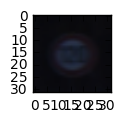

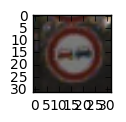

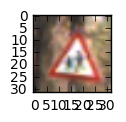

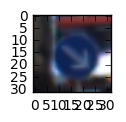

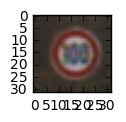

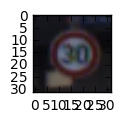

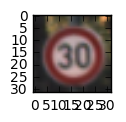

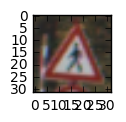

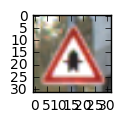

In [207]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline
for i in range(10):
    index = random.randint(0,len(X_train))
    image = X_train[index].squeeze()

    plt.figure(figsize = (1,1))
    plt.imshow(image)
    print(y_train[index])

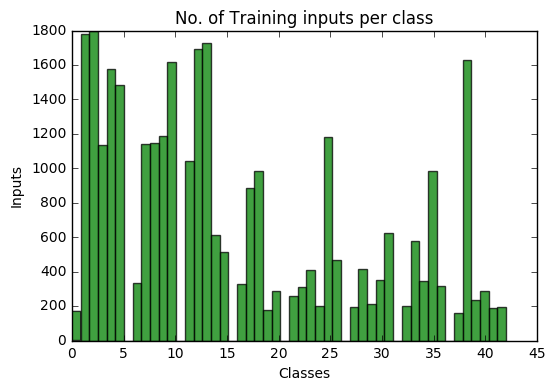

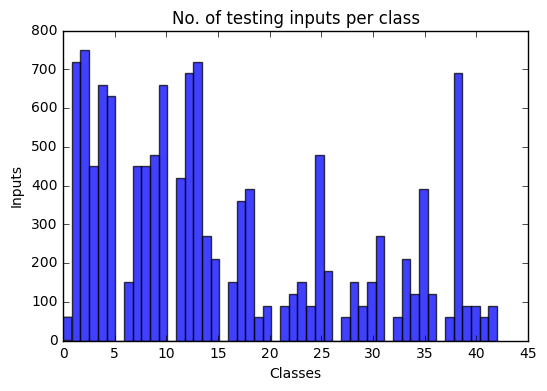

In [5]:
import scipy.ndimage

#set up the plot and show the training data as histogram
plt.figure(1)
n, bins, patches = plt.hist(y_train, 50, facecolor = 'green', alpha = 0.75)
plt.xlabel('Classes')
plt.ylabel('Inputs')
plt.title('No. of Training inputs per class')
plt.show()

#set up the plot and show the testing data as histogram
plt.figure(1)
n, bins, patches = plt.hist(y_test, 50, facecolor = 'blue', alpha = 0.75)
plt.xlabel('Classes')
plt.ylabel('Inputs')
plt.title('No. of testing inputs per class')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [228]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
print('Preprocessing')
from sklearn.utils import shuffle
import cv2

def preprocess(image):
    img = np.copy(image)
    img[:,:,0] = cv2.equalizeHist(img[:,:,0])
    img[:,:,1] = cv2.equalizeHist(img[:,:,1])
    img[:,:,2] = cv2.equalizeHist(img[:,:,2])
    #img = img + .5
    img = img/255.-.5
    
    #X_train, y_train = shuffle(X_train, y_train)
                
print('Done preprocessing')

Preprocessing
Done preprocessing


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Initially I tried making the image less noisy. However, in some cases it worked really well, but in some cases the image was beyond identifiable. So I decided against the denoising. I applied a histogram equalization to make the image uniformly bright thereby avoiding too many hotspots or darkspots. This may also help the algorithm because there the image is evenly bright. I also scaled images between -.5 and .5, by dividing by 255. and subtracting .5. All these were done on shuffled dataset.**

In [229]:
### SETTING UP TENSOR FLOW
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 128

In [230]:
### Generate data additional data (OPTIONAL!)
print('Generating transformed data...')
### Rotate image, translate image, shear image

def transformation(image,ang_range,shear_range,trans_range):
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = image.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    image = cv2.warpAffine(image,Rot_M,(cols,rows))
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    image = cv2.warpAffine(image,shear_M,(cols,rows))
    
    image = preprocess(image)
    return image

for i in range(n_classes):
        for j in range(len(y_train)):
            if (i == y_train[j]):
                transformation(X_train[j], 30, 5, 5)
                break

print('Done generating transformed data')

Generating transformed data...
Done generating transformed data


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**The training and testing data have been split up such that 20% of the training data is validation data since the one thing we are trying to avoid is overfitting. I did not add data, I just tried jittering the images. For jittering, I rotated the images by random number generated between +/- 30 degress, shifted them by +/- 5 pixels along vertical and horizontal, and a final shearing transformation. All these are done randomly. The reason for jittering is to make the convNets yield more robust learning to potential deformations in the test set.**

In [231]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Relu activation.
    conv1 = tf.nn.relu(conv1)
    print(conv1.get_shape().as_list())
    # Pooling. Input = 30x30x6. Output = 15x15x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(conv1.get_shape().as_list())
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    print(conv2.get_shape().as_list())
    # Pooling. Input = 13x13x16. Output = 6x6x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(conv2.get_shape().as_list())
    # Flatten. Input = 6x6x16. Output = 576.
    fc0   = flatten(conv2)
    print(fc0.get_shape().as_list())
    # Layer 3: Fully Connected. Input = 576. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(576, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    print(fc1.get_shape().as_list())
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    print(fc2.get_shape().as_list())
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    print(logits.get_shape().as_list())
    
    return logits

In [232]:
###Setting up features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Architecture:**

**Filter dimensions: 5X5.**

**Layer 1: Convolutional. The output shape is 30x30x6. With a RELU activation and Pooling with output shape of 15x15x6.**

**Layer 2: Convolutional. The output shape is 13x13x16. With a RELU activation and Pooling with output shape of 6x6x16.**

**Flattening: The output shape of the final pooling layer was flattened such that it is 1D instead of 3D. The output of this layer is 6*6*16 = 576.**

**Layer 3: Fully Connected. This layer has 120 outputs with a RELU activation.**

**Layer 4: Fully Connected. This layer has 84 outputs with a RELU activation.**

**Layer 5: Fully Connected (Logits). This is the final layer and has 43 outputs.**

In [233]:
### Train your model here.
### Feel free to use as many code cells as needed.

### TRAINING PIPELINE
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

[None, 30, 30, 6]
[None, 15, 15, 6]
[None, 13, 13, 16]
[None, 6, 6, 16]
[None, 576]
[None, 120]
[None, 84]
[None, 43]


In [238]:
###MODEL EVALUATION
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_loss/num_examples, total_accuracy/num_examples

In [239]:
### TRAIN THE MODEL
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        #X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_loss, validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Validation Loss = {:.3f}".format(validation_loss))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.711
Validation Loss = 1.025

EPOCH 2 ...
Validation Accuracy = 0.865
Validation Loss = 0.497

EPOCH 3 ...
Validation Accuracy = 0.895
Validation Loss = 0.388

EPOCH 4 ...
Validation Accuracy = 0.931
Validation Loss = 0.275

EPOCH 5 ...
Validation Accuracy = 0.937
Validation Loss = 0.261

EPOCH 6 ...
Validation Accuracy = 0.928
Validation Loss = 0.333

EPOCH 7 ...
Validation Accuracy = 0.956
Validation Loss = 0.197

EPOCH 8 ...
Validation Accuracy = 0.955
Validation Loss = 0.205

EPOCH 9 ...
Validation Accuracy = 0.951
Validation Loss = 0.234

EPOCH 10 ...
Validation Accuracy = 0.966
Validation Loss = 0.171

EPOCH 11 ...
Validation Accuracy = 0.968
Validation Loss = 0.164

EPOCH 12 ...
Validation Accuracy = 0.958
Validation Loss = 0.201

EPOCH 13 ...
Validation Accuracy = 0.965
Validation Loss = 0.175

EPOCH 14 ...
Validation Accuracy = 0.967
Validation Loss = 0.181

EPOCH 15 ...
Validation Accuracy = 0.946
Validation Loss = 0.260

Model 

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**I used the following to train my model:**

**Epochs: 15, batch size: 128**

**Hyperparameters: learning rate of 1e-3, mean of 0 and standard deviation of .1**

** Optimizer: I used adam optimizer with default settings for optimization and learning rate as specified by hyperparameters.**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**I read through many articles for image identification as well as the link to the paper provided above. I also went through the LENET lab and thought that the LENET architecture of Convolutional networks with pooling could give me a good accuracy.**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

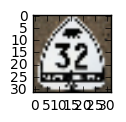

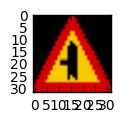

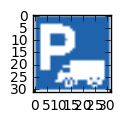

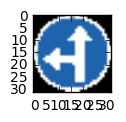

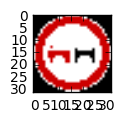

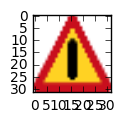

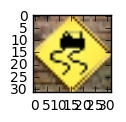

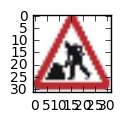

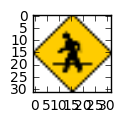

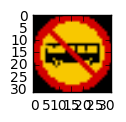

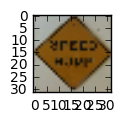

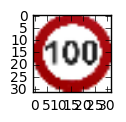

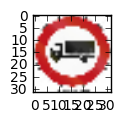

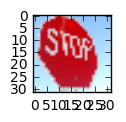

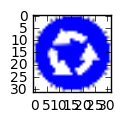

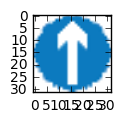

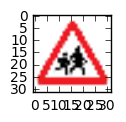

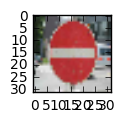

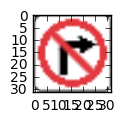

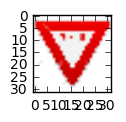

In [263]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#images need to be size 32x32x3
#images also need to be scaled between -.5 and .5.
new_images = np.float32(np.zeros((20,32,32,3)))
for i in range(1,21):
    image = cv2.imread("../traffic-signs-data/test_images/test{}.jpg".format(str(i)))
    image = cv2.resize(image,(32,32))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image/255.-.5
    new_images[i-1] = image
    plt.figure(figsize = (1,1))
    plt.imshow(new_images[i-1]+.5)
    plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**The above shown images are the ones I obtained from google images. I am curious to see how all images are handled by the model. In particular the parking sign, men at work sign, us highway sign, the speed bump sign and no trolley crossing sign**

In [264]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
new_dict = tf.placeholder(tf.float32, (None, 32, 32, 3))


preds = tf.nn.softmax(LeNet(new_dict))

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    saver.restore(sess, 'lenet')
    print('model restored')
    
    values = sess.run(preds, feed_dict = {new_dict: new_images})
    top_k = sess.run(tf.nn.top_k(values, 5, sorted = True))
    print(np.argmax(values, 1))
    print('Done predicting')
    

[None, 30, 30, 6]
[None, 15, 15, 6]
[None, 13, 13, 16]
[None, 6, 6, 16]
[None, 576]
[None, 120]
[None, 84]
[None, 43]
model restored
[15 14 36 19 14 14 15 14 15 15 36 19 12 14 36 36 14 14 12 14]
Done predicting


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**The model performed very poorly on the test images. It at least identified the stop sign with greater than 20% probability. Overall the model was less than 20% accurate.**

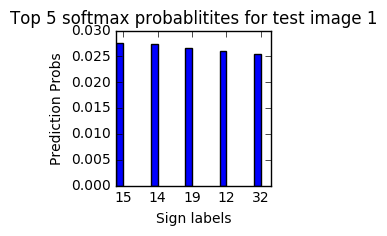

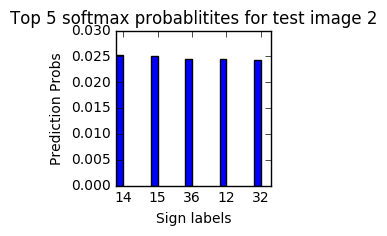

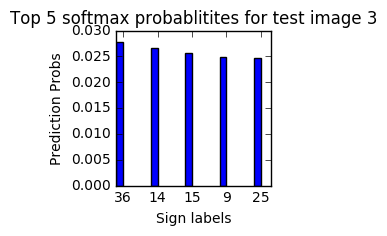

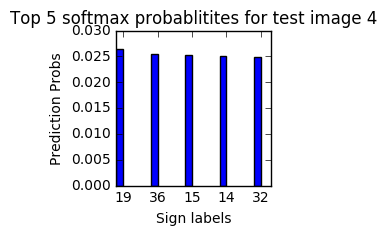

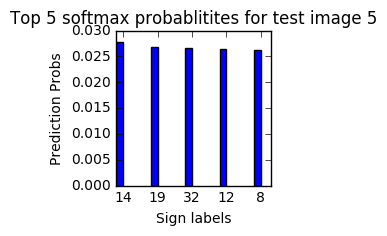

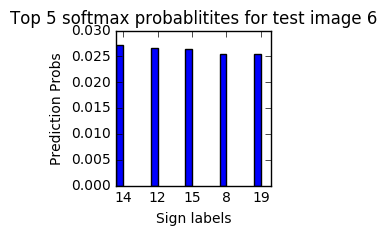

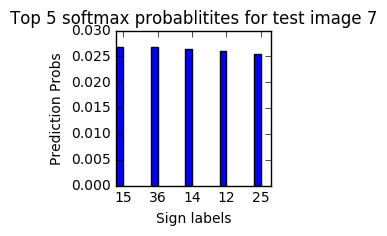

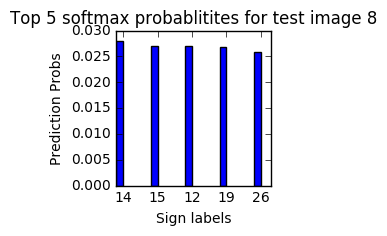

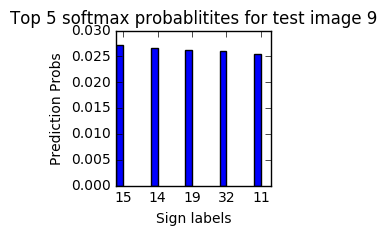

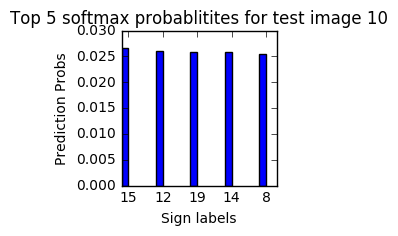

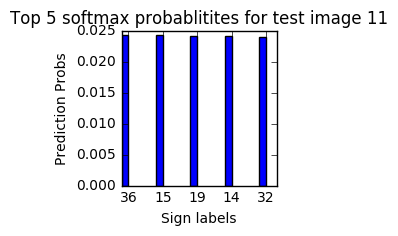

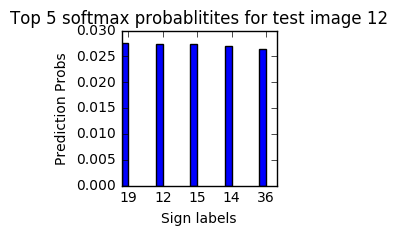

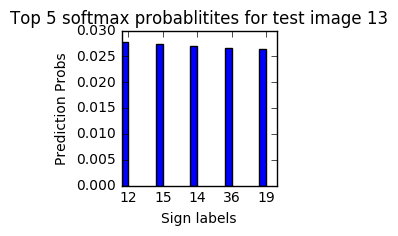

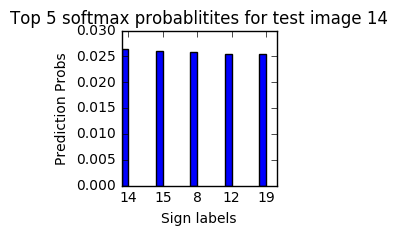

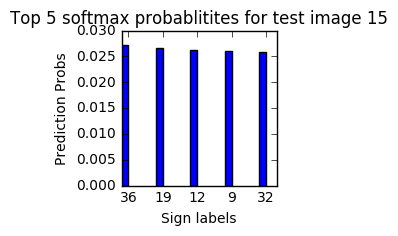

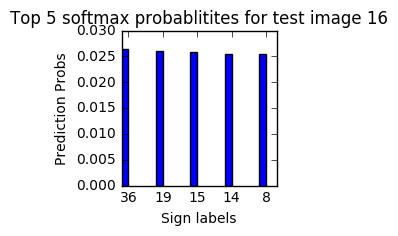

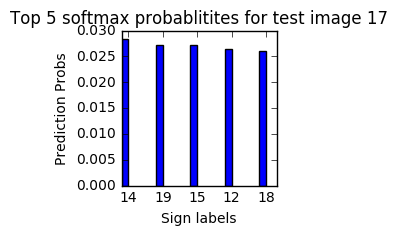

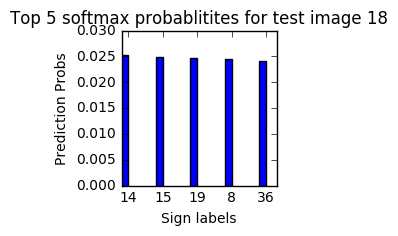

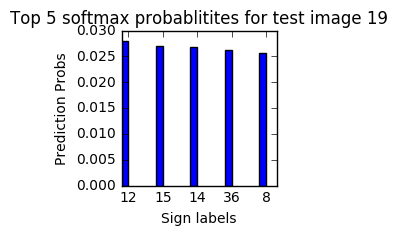

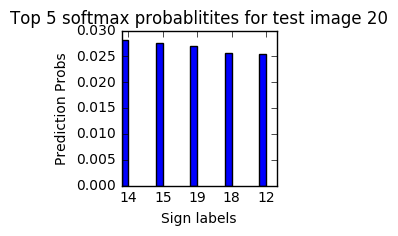

In [269]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
top_k_values = top_k[0]
top_k_indices = top_k[1]

ind = np.arange(5)

for i in range(20):
    plt.figure(i, figsize = (2,2))
    values = top_k_values[i]
    plt.bar(ind, values, 0.2)
    plt.ylabel('Prediction Probs')
    plt.xlabel('Sign labels')
    plt.title('Top 5 softmax probablitites for test image {}'.format(str(i+1)))
    plt.xticks((ind+0.2), tuple(top_k_indices[i]))
    
plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**The top 5 on some occassions has the right class of sign in it, however, I am still disappointed that my model that trained to 95% is unable to even identify one sign with > 50% probability. This to me seems to be a classic case of overfitting.**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.